In [0]:
pip install ann_visualizer

In [0]:
pip install graphviz

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [0]:
import random as r
r.seed(13)

In [0]:
data = pd.read_csv('diabetes.csv')

In [0]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,?,33.6,0.627,50,1
1,1,85,66,29,?,26.6,0.351,31,0
2,8,183,64,?,?,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,?,?,25.6,0.201,30,0
6,3,78,50,32,88,31,0.248,26,1
7,10,115,?,?,?,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,?,?,?,0.232,54,1


In [0]:
data.shape

(768, 9)

In [0]:
data.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958
std,3.369578,0.331329,11.760232,0.476951
min,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.243750,24.000000,0.000000
50%,3.000000,0.372500,29.000000,0.000000
75%,6.000000,0.626250,41.000000,1.000000
max,17.000000,2.420000,81.000000,1.000000


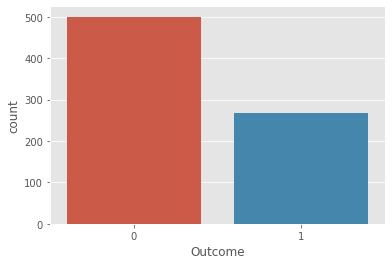

In [0]:
plot_sns = sns.countplot(data['Outcome'])

In [0]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#A) Data Preprocessing

## Missing Data 

In [0]:
data.replace(to_replace='?', inplace=True, value=np.NaN)

In [0]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,NaN,NaN,25.6,0.201,30,0
6,3,78,50,32,88,31,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,NaN,NaN,NaN,0.232,54,1


In [0]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               227
Insulin                     371
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [0]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df= pd.DataFrame(imp.fit_transform(data),
                 index= data.index,
                 columns = data.columns)

In [0]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.00000,35.00000,154.372796,33.600000,0.627,50.0,1.0
1,1.0,85.0,66.00000,29.00000,154.372796,26.600000,0.351,31.0,0.0
2,8.0,183.0,64.00000,29.15342,154.372796,23.300000,0.672,32.0,1.0
3,1.0,89.0,66.00000,23.00000,94.000000,28.100000,0.167,21.0,0.0
4,0.0,137.0,40.00000,35.00000,168.000000,43.100000,2.288,33.0,1.0
5,5.0,116.0,74.00000,29.15342,154.372796,25.600000,0.201,30.0,0.0
6,3.0,78.0,50.00000,32.00000,88.000000,31.000000,0.248,26.0,1.0
7,10.0,115.0,72.30654,29.15342,154.372796,35.300000,0.134,29.0,0.0
8,2.0,197.0,70.00000,45.00000,543.000000,30.500000,0.158,53.0,1.0
9,8.0,125.0,96.00000,29.15342,154.372796,32.457464,0.232,54.0,1.0


In [0]:
# to make outcome from float to int
df['Outcome'] = data['Outcome']

In [0]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.00000,35.00000,154.372796,33.600000,0.627,50.0,1
1,1.0,85.0,66.00000,29.00000,154.372796,26.600000,0.351,31.0,0
2,8.0,183.0,64.00000,29.15342,154.372796,23.300000,0.672,32.0,1
3,1.0,89.0,66.00000,23.00000,94.000000,28.100000,0.167,21.0,0
4,0.0,137.0,40.00000,35.00000,168.000000,43.100000,2.288,33.0,1
5,5.0,116.0,74.00000,29.15342,154.372796,25.600000,0.201,30.0,0
6,3.0,78.0,50.00000,32.00000,88.000000,31.000000,0.248,26.0,1
7,10.0,115.0,72.30654,29.15342,154.372796,35.300000,0.134,29.0,0
8,2.0,197.0,70.00000,45.00000,543.000000,30.500000,0.158,53.0,1
9,8.0,125.0,96.00000,29.15342,154.372796,32.457464,0.232,54.0,1


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.306540,29.153420,154.372796,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.375272,8.790942,85.571663,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,120.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,154.372796,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,154.372796,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


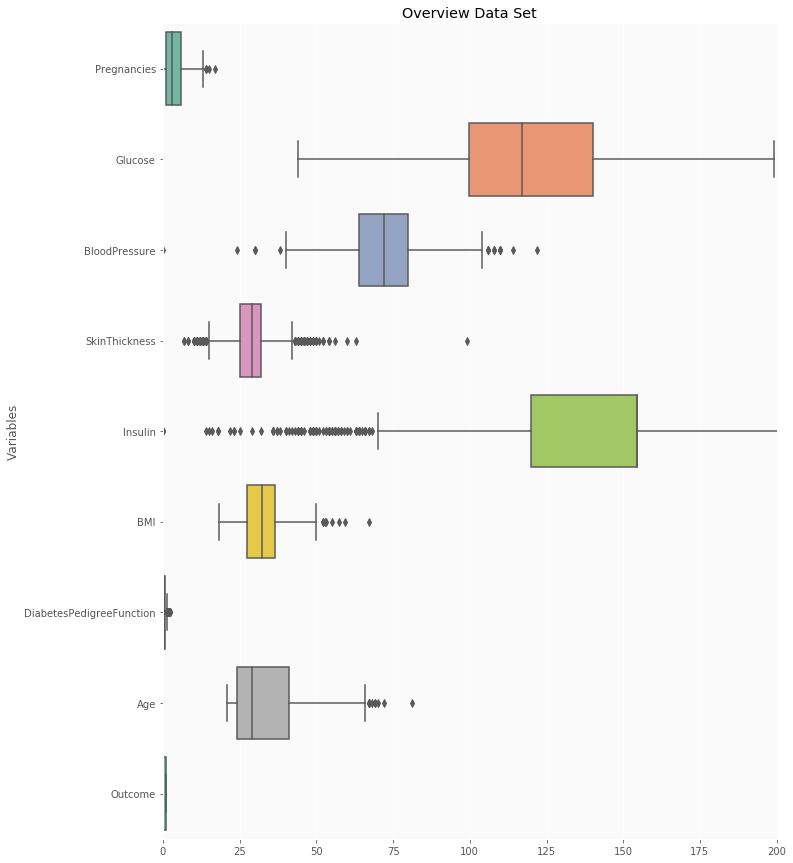

In [0]:
import matplotlib.pyplot as plt

plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

## Normalization/Standardization

In [0]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
normalized_data = df[features]
# Normalization using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(normalized_data)
normalized_data = pd.DataFrame(scaler.transform(normalized_data), 
                               index=normalized_data.index, 
                               columns = normalized_data.columns)

In [0]:
normalized_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.590164,0.304348,0.182474,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.540984,0.239130,0.182474,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.524590,0.240798,0.182474,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.540984,0.173913,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.327869,0.304348,0.198582,0.509202,0.943638,0.200000
5,0.294118,0.464516,0.606557,0.240798,0.182474,0.151329,0.052519,0.150000
6,0.176471,0.219355,0.409836,0.271739,0.104019,0.261759,0.072588,0.083333
7,0.588235,0.458065,0.592677,0.240798,0.182474,0.349693,0.023911,0.133333
8,0.117647,0.987097,0.573770,0.413043,0.641844,0.251534,0.034159,0.533333
9,0.470588,0.522581,0.786885,0.240798,0.182474,0.291564,0.065756,0.550000


## Train-Test split

In [0]:
X = normalized_data
y = df['Outcome']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
print(X_train.shape, y_train.shape)

(576, 8) (576,)


In [0]:
print(X_test.shape, y_test.shape)

(192, 8) (192,)


#B) Model

## Single Layer

### Training Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# create model
singleLayer = Sequential()
singleLayer.add(Dense(1, input_dim=8, activation='linear'))
singleLayer.add(Dense(1, activation='sigmoid'))

# Compile model
singleLayer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
singleLayer.fit(X_train, y_train, epochs=150)

# evaluate the model
scores = singleLayer.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (singleLayer.metrics_names[1], scores[1]*100))


In [0]:
# Print model summary
singleLayer.summary()

### Plotting Neural Network

In [0]:
from ann_visualizer.visualize import ann_viz;

ann_viz(singleLayer, title="Simple Feedforward Network",filename="singleLayer.gv")

###Printing the Weights and Bias

In [0]:
singleLayer.layers

In [0]:
# Layer 1
print("Weights =", singleLayer.layers[0].get_weights()[0])
print("Biases =", singleLayer.layers[0].get_weights()[1])

In [0]:
# Layer 2
print("Weights =", singleLayer.layers[1].get_weights()[0])
print("Biases =", singleLayer.layers[1].get_weights()[1])

### Generating predictions on test set

In [0]:
test_pred1 = singleLayer.predict(X_test)

In [0]:
y_final1 = (test_pred1 > 0.40).astype(int).reshape(X_test.shape[0])

In [0]:
test_acc1 = (y_final1 == y_test).sum()/y_test.shape[0] * 100

print("Accuracy on test set is: %"+str(test_acc1))

In [0]:
X_test.loc[6]

In [0]:
a =pd.DataFrame([[0.176471, 0.219355, 0.409836, 0.271739, 0.104019, 0.261759, 0.072588, 0.083333]])
print(singleLayer.predict(a))
# Threshold = 0.40
print((singleLayer.predict(a) > 0.40).astype(int))

In [0]:
y_test.loc[6]

In [0]:
b = pd.DataFrame([[0.352941, 0.967742, 0.639344, 0.240798, 0.182474, 0.108384, 0.0217768, 0.633333]])
print(singleLayer.predict(b))
# Threshold = 0.40
print((singleLayer.predict(b) > 0.40).astype(int))

In [0]:
y_test.loc[319]

### Confusion matrix

In [0]:
def confusionMatrix(y_test, y_pred):
  from sklearn.metrics import confusion_matrix

  # compute the confusion matrix
  confusion_mtx = confusion_matrix(y_test, y_pred) 

  cm = pd.DataFrame(confusion_mtx)
  TP = cm.iloc[1,1] # True Positive 
  TN = cm.iloc[0,0] # True Negative 
  FP = cm.iloc[0,1] # False Positive
  FN = cm.iloc[1,0] # False Negative

  print('Sensitivity: ', (TP/(FN+TP))*100)
  print('Specificity: ', (TN/(FP+TN))*100)

  # plot the confusion matrix
  f,ax = plt.subplots(figsize=(6, 4))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix- Single Layer ")
  plt.show()

In [0]:
confusionMatrix(y_test, y_final1)

### ROC Curve

In [0]:
def getROCMetrics(y_test, y_pred, text):
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)

  #ROC Curve
  fig,ax1 = plt.subplots(figsize=(9,6))
  ax1.plot(fpr, tpr,color='orange')
  ax1.legend(['ROC Curve'],loc=1)
  ax1.set_xlim([-0.005, 1.0])
  ax1.set_ylim([0,1])
  ax1.set_ylabel('True Positive Rate (Sensitivity)')
  ax1.set_xlabel('False Positive Rate \n(1 - Specificity)\n FP / (TN + FP)')
  ax1.set_title(text)
  
  plt.show()
  
  rf_auc = roc_auc_score(y_test,y_pred)
  print('AUC Score:', rf_auc*100)
  return rf_auc*100

In [0]:
getROCMetrics(y_test, y_final1, 'ROC Curve for Single Layer Perceptron\n')

## Multi Layer

### Training Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras import optimizers

# create model
multiLayer = Sequential()
multiLayer.add(Dense(5, input_dim=8, activation='linear'))
multiLayer.add(Dense(5, activation='linear'))
multiLayer.add(Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
# Compile model
multiLayer.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
multiLayer.fit(X_train, y_train, epochs=100, batch_size=10)

# evaluate the model
scores = multiLayer.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (multiLayer.metrics_names[1], scores[1]*100))

Epoch 1/100
576/576 [==============================] - 1s 1ms/step - loss: 0.6972 - acc: 0.5295
Epoch 2/100
576/576 [==============================] - 0s 125us/step - loss: 0.6335 - acc: 0.6458
Epoch 3/100
576/576 [==============================] - 0s 118us/step - loss: 0.6215 - acc: 0.6563
Epoch 4/100
576/576 [==============================] - 0s 124us/step - loss: 0.6126 - acc: 0.6615
Epoch 5/100
576/576 [==============================] - 0s 119us/step - loss: 0.6041 - acc: 0.6701
Epoch 6/100
576/576 [==============================] - 0s 133us/step - loss: 0.5962 - acc: 0.6788
Epoch 7/100
576/576 [==============================] - 0s 129us/step - loss: 0.5876 - acc: 0.6806
Epoch 8/100
576/576 [==============================] - 0s 124us/step - loss: 0.5800 - acc: 0.6997
Epoch 9/100
576/576 [==============================] - 0s 132us/step - loss: 0.5720 - acc: 0.7101
Epoch 10/100
576/576 [==============================] - 0s 125us/step - loss: 0.5643 - acc: 0.7222
Epoch 11/100
576/576 

In [0]:
# Print model summary
multiLayer.summary()

### Plotting Neural Network

In [0]:
from ann_visualizer.visualize import ann_viz;

ann_viz(multiLayer, title="Multi Layer Feedforward Network",filename="multiLayer.gv")

### Printing the Weights and Bias

In [0]:
# Layer 1
print("Weights =", multiLayer.layers[0].get_weights()[0])
print("Biases =", multiLayer.layers[0].get_weights()[1])

In [0]:
# Layer 2
print("Weights =", multiLayer.layers[1].get_weights()[0])
print("Biases =", multiLayer.layers[1].get_weights()[1])

In [0]:
# Layer 3
print("Weights =", multiLayer.layers[2].get_weights()[0])
print("Biases =", multiLayer.layers[2].get_weights()[1])

### Generating Predictions on Test Set

In [0]:
test_pred2 = multiLayer.predict(X_test)

In [0]:
test_pred2

array([[0.2805125 ],
       [0.16384485],
       [0.10429913],
       [0.13395095],
       [0.45831668],
       [0.44795537],
       [0.01159701],
       [0.34168035],
       [0.56616104],
       [0.7607186 ],
       [0.21903324],
       [0.8948109 ],
       [0.4469864 ],
       [0.21828708],
       [0.05652276],
       [0.3844519 ],
       [0.10655487],
       [0.06277791],
       [0.7253818 ],
       [0.5579824 ],
       [0.1840814 ],
       [0.06495771],
       [0.5292131 ],
       [0.08308035],
       [0.5455958 ],
       [0.88481164],
       [0.10336563],
       [0.02364081],
       [0.25562543],
       [0.08605444],
       [0.92171633],
       [0.84761596],
       [0.8518127 ],
       [0.6303443 ],
       [0.5301551 ],
       [0.7078635 ],
       [0.979182  ],
       [0.18072522],
       [0.43270156],
       [0.47630563],
       [0.05356637],
       [0.5345775 ],
       [0.4830611 ],
       [0.28870702],
       [0.02522671],
       [0.5752129 ],
       [0.6289586 ],
       [0.180

In [0]:
y_final2 = (test_pred2 > 0.60).astype(int).reshape(X_test.shape[0])

In [0]:
y_final2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [0]:
test_acc2 = (y_final2 == y_test).sum()/y_test.shape[0] * 100

print("Accuracy on test set is: %"+str(test_acc2))

Accuracy on test set is: %76.04166666666666


In [0]:
a =pd.DataFrame([[0.176471, 0.219355, 0.409836, 0.271739, 0.104019, 0.261759, 0.072588, 0.083333]])
print(multiLayer.predict(a))
# Threshold = 0.6
print((multiLayer.predict(a) > 0.6).astype(int))

[[0.1940743]]
[[0]]


In [0]:
y_test.loc[6]

In [0]:
b =pd.DataFrame([[0.352941, 0.967742, 0.639344, 0.240798, 0.182474, 0.108384, 0.0217768, 0.633333]])
print(multiLayer.predict(b))
# Threshold = 0.6
print((multiLayer.predict(b) > 0.6).astype(int))

In [0]:
y_test.loc[319]

###Confusion Matrix

In [0]:
confusionMatrix(y_test, y_final2)

### ROC Curve

In [0]:
getROCMetrics(y_test, y_final2, 'ROC Curve for Multi Layer Perceptron\n')

#C) Model Comparison

## SVM

In [0]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_train, y_train)

In [0]:
# predict the labels on validation dataset
predictions_SVM = svm.predict(X_test)

from sklearn.metrics import accuracy_score
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

In [0]:
svm.support_vectors_)

In [0]:
# Test 1
X_test.loc[6]

In [0]:
print(svm.predict([[0.176471, 0.219355, 0.409836, 0.271739, 0.104019, 0.261759, 0.072588, 0.083333]]))

In [0]:
y_test.loc[6]

In [0]:
# Test 2
X_test.loc[319]

In [0]:
print(svm.predict([[0.352941, 0.967742, 0.639344, 0.240798, 0.182474, 0.108384, 0.0217768, 0.633333]]))

In [0]:
y_test.loc[319]

###Confusion Matrix

In [0]:
confusionMatrix(y_test, predictions_SVM)

### ROC Curve

In [0]:
getROCMetrics(y_test, predictions_SVM,'ROC Curve for Support Vector Machine\n')

### New Section

In [0]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_final2)
auc = metrics.roc_auc_score(y_test, y_final2)*100
plt.plot(fpr,tpr,label="Multi Layer, auc="+str(auc))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(y_test, predictions_SVM)
auc = metrics.roc_auc_score(y_test, predictions_SVM)*100
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))

plt.legend(loc=0)